In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [37]:
df2 = pd.read_excel("grouped_final4_binaty.xlsx")
df2

,Zipcode,urination_count,urination_density_pop,urination_density_pop_degree,urination_density_area,PrecentAgeUnder5,PrecentAge5to9,PrecentAge10to14,PrecentAge15to19,PrecentAge20to24,...,shop_count,shop_density,toilet_count,toilet_density,Median Household Income,crime_rate,population_density,subway_count,AREA,POPULATION
0,10309,3,0.000091,0,1.389946e-08,0.061,0.060,0.069,0.051,0.047,...,137,6.347418e-07,4,1.853261e-08,102730,0.000242,0.000153,8,2.158358e+08,33114
1,11414,3,0.000115,0,4.692719e-08,0.044,0.046,0.064,0.046,0.041,...,17,2.659207e-07,0,0.000000e+00,75599,0.000153,0.000409,4,6.392882e+07,26148
2,11363,1,0.000142,0,4.124938e-08,0.062,0.063,0.045,0.030,0.041,...,2,8.249876e-08,0,0.000000e+00,111094,0.000000,0.000291,0,2.424279e+07,7060
3,10307,2,0.000142,0,4.345145e-08,0.051,0.059,0.075,0.076,0.065,...,29,6.300460e-07,0,0.000000e+00,108808,0.000497,0.000306,7,4.602838e+07,14096
4,11360,3,0.000158,0,7.725025e-08,0.052,0.024,0.042,0.043,0.053,...,3,7.725025e-08,3,7.725025e-08,84356,0.000000,0.000489,0,3.883482e+07,18973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10013,105,0.003752,1,6.739159e-06,0.061,0.045,0.041,0.027,0.065,...,378,2.426097e-05,5,3.209123e-07,130675,0.001215,0.001796,34,1.558058e+07,27985
161,10004,9,0.004115,1,6.639346e-07,0.033,0.016,0.015,0.035,0.026,...,40,2.950820e-06,22,1.622951e-06,204949,0.009145,0.000161,20,1.355555e+07,2187
162,10007,36,0.004916,1,6.756920e-06,0.099,0.054,0.025,0.021,0.052,...,47,8.821535e-06,0,0.000000e+00,250001,0.005053,0.001374,37,5.327871e+06,7323
163,10018,46,0.008359,1,4.296738e-06,0.036,0.009,0.009,0.021,0.074,...,148,1.382429e-05,2,1.868147e-07,136360,0.004543,0.000514,25,1.070580e+07,5503


# CLASSIFICATION

In [38]:
Y_name = 'urination_density_pop_degree'

In [39]:
y = df2[Y_name]
X = df2.drop(['urination_count','urination_density_pop' ,'Zipcode','urination_density_area','urination_density_pop_degree'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

SEED = 317
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=SEED)

In [41]:
%%time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# standardized numerical + dummies
scale_x = StandardScaler()
x_train_stan = X_train
y_train_stan = y_train
x_test_stan = X_test
y_test_stan = y_test


x_train_num = x_train_stan[['PrecentAgeUnder5', 'PrecentAge5to9', 'PrecentAge10to14',
       'PrecentAge15to19', 'PrecentAge20to24', 'PrecentAge25to34',
       'PrecentAge35to44', 'PrecentAge45to54', 'PrecentAge55to59',
       'PrecentAge60to64', 'PrecentAge65to74', 'PrecentAge75to84',
       'PrecentAge85andOlder', 'Male Percent', 'Female Percent',
       'PercentWhite', 'PercetnBlack', 'PercentAmericanIndianandAlaskaNative',
       'PercentAsian', 'PercentNativeHawaiianandOtherPacificIslander',
       'PercentSomeOtherRace', 'PercentHispanicOrLatino',
       'Less Than 9th Grade', '9th to 12th Grade, No Diploma',
       'High School Graduate', 'Some College No Degree', 'Associate Degree',
       'Bachelor Degree', 'Graduate or Professional Degree',
       'PercentUnder$10,000', 'Percetn$10,000to$14,999',
       'Percent$15,000to$24,999', 'Percetn$25,000to$34,999',
       'Percent$35,000to$49,999', 'Percetn$50,000to$74,999',
       'Percent$75,000to$99,999', 'Percetn$100,000to$149,999',
       'Percent$150,000to$199,999', 'Percetn$200,000ormore', 'tree_count',
       'tree_density', 'green_space_ratio', 'shop_count', 'shop_density',
       'toilet_count', 'toilet_density', 'Median Household Income',
       'crime_rate', 'population_density', 'subway_count', 'AREA',
       'POPULATION']]
x_train_num_scale = scale_x.fit_transform(x_train_num)

x_train_stan[['PrecentAgeUnder5', 'PrecentAge5to9', 'PrecentAge10to14',
       'PrecentAge15to19', 'PrecentAge20to24', 'PrecentAge25to34',
       'PrecentAge35to44', 'PrecentAge45to54', 'PrecentAge55to59',
       'PrecentAge60to64', 'PrecentAge65to74', 'PrecentAge75to84',
       'PrecentAge85andOlder', 'Male Percent', 'Female Percent',
       'PercentWhite', 'PercetnBlack', 'PercentAmericanIndianandAlaskaNative',
       'PercentAsian', 'PercentNativeHawaiianandOtherPacificIslander',
       'PercentSomeOtherRace', 'PercentHispanicOrLatino',
       'Less Than 9th Grade', '9th to 12th Grade, No Diploma',
       'High School Graduate', 'Some College No Degree', 'Associate Degree',
       'Bachelor Degree', 'Graduate or Professional Degree',
       'PercentUnder$10,000', 'Percetn$10,000to$14,999',
       'Percent$15,000to$24,999', 'Percetn$25,000to$34,999',
       'Percent$35,000to$49,999', 'Percetn$50,000to$74,999',
       'Percent$75,000to$99,999', 'Percetn$100,000to$149,999',
       'Percent$150,000to$199,999', 'Percetn$200,000ormore', 'tree_count',
       'tree_density', 'green_space_ratio', 'shop_count', 'shop_density',
       'toilet_count', 'toilet_density', 'Median Household Income',
       'crime_rate', 'population_density', 'subway_count', 'AREA',
       'POPULATION']] = x_train_num_scale

x_test_num = x_test_stan[['PrecentAgeUnder5', 'PrecentAge5to9', 'PrecentAge10to14',
       'PrecentAge15to19', 'PrecentAge20to24', 'PrecentAge25to34',
       'PrecentAge35to44', 'PrecentAge45to54', 'PrecentAge55to59',
       'PrecentAge60to64', 'PrecentAge65to74', 'PrecentAge75to84',
       'PrecentAge85andOlder', 'Male Percent', 'Female Percent',
       'PercentWhite', 'PercetnBlack', 'PercentAmericanIndianandAlaskaNative',
       'PercentAsian', 'PercentNativeHawaiianandOtherPacificIslander',
       'PercentSomeOtherRace', 'PercentHispanicOrLatino',
       'Less Than 9th Grade', '9th to 12th Grade, No Diploma',
       'High School Graduate', 'Some College No Degree', 'Associate Degree',
       'Bachelor Degree', 'Graduate or Professional Degree',
       'PercentUnder$10,000', 'Percetn$10,000to$14,999',
       'Percent$15,000to$24,999', 'Percetn$25,000to$34,999',
       'Percent$35,000to$49,999', 'Percetn$50,000to$74,999',
       'Percent$75,000to$99,999', 'Percetn$100,000to$149,999',
       'Percent$150,000to$199,999', 'Percetn$200,000ormore', 'tree_count',
       'tree_density', 'green_space_ratio', 'shop_count', 'shop_density',
       'toilet_count', 'toilet_density', 'Median Household Income',
       'crime_rate', 'population_density', 'subway_count', 'AREA',
       'POPULATION']]
x_test_num_scale = scale_x.transform(x_test_num)
x_test_stan[['PrecentAgeUnder5', 'PrecentAge5to9', 'PrecentAge10to14',
       'PrecentAge15to19', 'PrecentAge20to24', 'PrecentAge25to34',
       'PrecentAge35to44', 'PrecentAge45to54', 'PrecentAge55to59',
       'PrecentAge60to64', 'PrecentAge65to74', 'PrecentAge75to84',
       'PrecentAge85andOlder', 'Male Percent', 'Female Percent',
       'PercentWhite', 'PercetnBlack', 'PercentAmericanIndianandAlaskaNative',
       'PercentAsian', 'PercentNativeHawaiianandOtherPacificIslander',
       'PercentSomeOtherRace', 'PercentHispanicOrLatino',
       'Less Than 9th Grade', '9th to 12th Grade, No Diploma',
       'High School Graduate', 'Some College No Degree', 'Associate Degree',
       'Bachelor Degree', 'Graduate or Professional Degree',
       'PercentUnder$10,000', 'Percetn$10,000to$14,999',
       'Percent$15,000to$24,999', 'Percetn$25,000to$34,999',
       'Percent$35,000to$49,999', 'Percetn$50,000to$74,999',
       'Percent$75,000to$99,999', 'Percetn$100,000to$149,999',
       'Percent$150,000to$199,999', 'Percetn$200,000ormore', 'tree_count',
       'tree_density', 'green_space_ratio', 'shop_count', 'shop_density',
       'toilet_count', 'toilet_density', 'Median Household Income',
       'crime_rate', 'population_density', 'subway_count', 'AREA',
       'POPULATION']] = x_test_num_scale

# scale_y = StandardScaler()
# y_train_stan = scale_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
# y_test_stan = scale_y.transform(np.array(y_test).reshape(-1,1)).ravel()

Wall time: 26 ms


In [45]:
%%time
# balanced_accuracy
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
# Create the grid parameter:
SVM_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]             }

SVM = GridSearchCV(
                    estimator=svm.SVC(),
                    param_grid = SVM_params,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1,
                    verbose=2)

SVM.fit(x_train_stan, y_train_stan)

# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % SVM.best_score_)
print('\nBest params:\n', SVM.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s


Best accuracy: 0.828

Best params:
 {'C': 10, 'gamma': 0.001}
Wall time: 5.03 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.9s finished


in-sample classification accuracy=  0.8585858585858586
out-of-sample classification accuracy=  0.8787878787878788
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.80      0.80      0.80        20

    accuracy                           0.88        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.88      0.88      0.88        66

Wall time: 90.1 ms


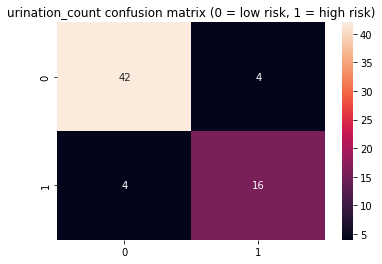

In [43]:
%%time
predictor1 = svm.SVC(kernel='rbf',
                     C = 10,
                     gamma = 0.001,
                     max_iter = -1)

predictor1.fit(x_train_stan, y_train_stan.astype('int'))
correct_in = 1.0*(predictor1.predict(x_train_stan)==np.asarray(y_train_stan)).sum()/len(y_train_stan)
correct_out = 1.0*(predictor1.predict(x_test_stan)==np.asarray(y_test_stan)).sum()/len(y_test_stan)
print('in-sample classification accuracy= ',correct_in)
print('out-of-sample classification accuracy= ',correct_out)

y_pred = predictor1.predict(x_test_stan)
cm = confusion_matrix(y_test_stan, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('urination_count confusion matrix (0 = low risk, 1 = high risk)')

print(classification_report(y_test,y_pred))